## <span style="color:yellow"> Objective: Read and import the API into DataFrame </span>

[Go to USGS API documentation](https://earthquake.usgs.gov/fdsnws/event/1/)

   - [Importing the required libraries](#cell_ref_0)
   - [Reading the geojson files from USGS API](#cell_ref_1)
   - [No null value](#cell_ref_1)
   - [The data type seems correct, except for salesdate](#cell_ref_1)
   - [Converted the sale_date to datetime and added a few date features](#cell_ref_2)
   - [sq_ft and price have negative values, so they need to be fixed. I simply converted values to absolutes](#cell_ref_3)
   - [171 rows had 0 (sq_ft, bed, bath) which probab. means land, so I replaced the zeros with mean values for those columns](#cell_ref_4)
   - [Still latitude and longitude seem to be swapped for some rows, so swapped those](#cell_ref_5)
    

- <span style="color:green"> - The data seems <em>**clean**</em> now. So, moving to modeling. </span>

<a id='cell_ref_0'></a>

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Function for EQ json reading

<a id='cell_ref_1'></a>

In [2]:
def get_EQ_USGS(*arg):
    
    baseurl = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
    
    params_diction={}
    
    params_diction['format'] = get_format
    
    params_diction['starttime'] = min_date
    params_diction['endtime'] = max_date
    
    params_diction['minmagnitude'] = min_magnitude
    params_diction['maxmagnitude'] = max_magnitude
    
    params_diction['minlatitude'] = min_latitude
    params_diction['maxlatitude'] = max_latitude
    params_diction['minlongitude'] = min_longitude
    params_diction['maxlongitude'] = max_longitude
    
    params_diction['orderby'] = order_by
    
    params_diction['limit'] = limit_data
    
    resp = requests.get(baseurl, params=params_diction)
    
    return resp.json()


- Parameterically reading the json data for Earthquakes

In [3]:
get_format = "geojson" # Format for importing data

min_date = "2020-06-01" # Minimum date for reporting the data
max_date = "2020-06-30" # Maximum date for reporting the data

min_magnitude = "1" # Minimum magnitude of the reporting data
max_magnitude = "10" # Maximum magnitude of the reporting data

min_latitude = "24.6" # Minimum latitude
max_latitude = "50" # Maximum latitude

min_longitude = "-125" # Minimum longitude
max_longitude = "-65" # Maximum longitude

order_by = "time" # Ordering the data by parameters
limit_data = "2000" # Maximum number of data

Params = [get_format, min_date, max_date, min_magnitude, max_magnitude, 
          min_latitude, max_latitude, min_longitude, max_longitude, order_by, 
          limit_data]

USGS_EQ_data_pull = get_EQ_USGS(Params)

#USGS_data_json = print(json.dumps(USGS_data, indent=2))

In [4]:
print(USGS_EQ_data_pull.keys())

dict_keys(['type', 'metadata', 'features', 'bbox'])


In [5]:
print(USGS_EQ_data_pull["type"])

FeatureCollection


In [6]:
print(json.dumps(USGS_EQ_data_pull["metadata"], indent=2))

{
  "generated": 1594174510000,
  "url": "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2020-06-01&endtime=2020-06-30&minmagnitude=1&maxmagnitude=10&minlatitude=24.6&maxlatitude=50&minlongitude=-125&maxlongitude=-65&orderby=time&limit=2000",
  "title": "USGS Earthquakes",
  "status": 200,
  "api": "1.10.3",
  "limit": 2000,
  "offset": 1,
  "count": 2000
}


In [7]:
print(json.dumps(USGS_EQ_data_pull["features"][0], indent=2)) # Printing only the first element of the list

{
  "type": "Feature",
  "properties": {
    "mag": 1.15,
    "place": "12km SE of Olancha, CA",
    "time": 1593474788120,
    "updated": 1593546285277,
    "tz": -480,
    "url": "https://earthquake.usgs.gov/earthquakes/eventpage/ci39273063",
    "detail": "https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci39273063&format=geojson",
    "felt": null,
    "cdi": null,
    "mmi": null,
    "alert": null,
    "status": "reviewed",
    "tsunami": 0,
    "sig": 20,
    "net": "ci",
    "code": "39273063",
    "ids": ",ci39273063,",
    "sources": ",ci,",
    "types": ",geoserve,nearby-cities,origin,phase-data,scitech-link,",
    "nst": 16,
    "dmin": 0.1815,
    "rms": 0.09,
    "gap": 131,
    "magType": "ml",
    "type": "earthquake",
    "title": "M 1.2 - 12km SE of Olancha, CA"
  },
  "geometry": {
    "type": "Point",
    "coordinates": [
      -117.891,
      36.2163333,
      1.51
    ]
  },
  "id": "ci39273063"
}


In [8]:
print(USGS_EQ_data_pull["bbox"])

[-124.6545, 31.0919, -3.49, -69.2743, 49.3865, 41.86]


# Step 1: Converting the imported "feature" json data into pandas dataframe

In [9]:
USGS_EQ_features = USGS_EQ_data_pull["features"]

- Saving the imported geojson file

In [10]:
with open('USGS_EQ.json', 'w') as json_file:
    json.dump(USGS_EQ_features, json_file)

- Taking it into pandas

In [11]:
df_eq = pd.read_json("USGS_EQ.json",
                        lines=True,
                        orient='columns')

df_eq.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,"{'type': 'Feature', 'properties': {'mag': 1.15...","{'type': 'Feature', 'properties': {'mag': 1.72...","{'type': 'Feature', 'properties': {'mag': 2.5,...","{'type': 'Feature', 'properties': {'mag': 1.4,...","{'type': 'Feature', 'properties': {'mag': 1.45...","{'type': 'Feature', 'properties': {'mag': 1.5,...","{'type': 'Feature', 'properties': {'mag': 1.44...","{'type': 'Feature', 'properties': {'mag': 1.3,...","{'type': 'Feature', 'properties': {'mag': 1.47...","{'type': 'Feature', 'properties': {'mag': 1.03...",...,"{'type': 'Feature', 'properties': {'mag': 3.79...","{'type': 'Feature', 'properties': {'mag': 1.48...","{'type': 'Feature', 'properties': {'mag': 1.2,...","{'type': 'Feature', 'properties': {'mag': 1.69...","{'type': 'Feature', 'properties': {'mag': 2.88...","{'type': 'Feature', 'properties': {'mag': 2.36...","{'type': 'Feature', 'properties': {'mag': 1.52...","{'type': 'Feature', 'properties': {'mag': 1.71...","{'type': 'Feature', 'properties': {'mag': 1.1,...","{'type': 'Feature', 'properties': {'mag': 1.9,..."


Opening the nested json file

In [12]:
df_5 = pd.DataFrame()
cnt = 0

for i in df_eq:
    df_1 = df_eq[i]
    
    df_2 = pd.DataFrame([j for j in df_1])
    
    df_3 = df_2["properties"]
    
    df_4 = pd.DataFrame([j for j in df_3])
    
    df_5= df_5.append(df_4)

df_eq_parsed_properties = df_5

In [13]:
df_eq_parsed_properties.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,1.15,"12km SE of Olancha, CA",1593474788120,1593546285277,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",ci39273063,",",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",16,0.18150,0.09,131,ml,earthquake,"M 1.2 - 12km SE of Olancha, CA"
0,1.72,"15km W of Searles Valley, CA",1593474299060,1593524436810,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",ci39273055,",",ci,",",focal-mechanism,geoserve,nearby-cities,origin...",22,0.06672,0.13,85,ml,earthquake,"M 1.7 - 15km W of Searles Valley, CA"
0,2.50,"67km W of Tonopah, Nevada",1593472281375,1593483562709,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",nn00755123,us7000aes2,",",nn,us,",",geoserve,origin,phase-data,",22,0.02900,0.1229,48.31,ml,earthquake,"M 2.5 - 67km W of Tonopah, Nevada"
0,1.40,"58km WNW of Tonopah, Nevada",1593471815310,1593472363458,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",nn00755120,",",nn,",",geoserve,origin,phase-data,",14,0.02000,0.13,92.68,ml,earthquake,"M 1.4 - 58km WNW of Tonopah, Nevada"
0,1.45,"18km NNE of Olancha, CA",1593471653780,1593626384714,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",ci39273015,",",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",24,0.14480,0.22,66,ml,earthquake,"M 1.5 - 18km NNE of Olancha, CA"


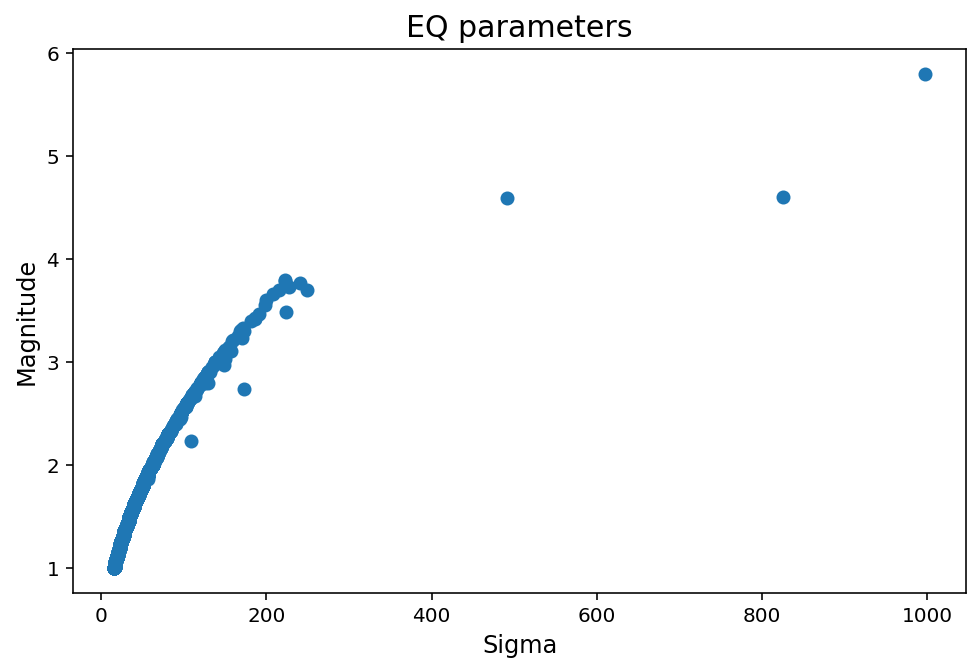

In [14]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize = [8, 5])

plt.scatter(df_eq_parsed_properties.sig,df_eq_parsed_properties.mag);

# Format title and axis labels
plt.title("EQ parameters", fontsize = 15);

plt.xlabel("Sigma", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

# Step 2: importing the coordinates

In [15]:
df_eq[0]

0    {'type': 'Feature', 'properties': {'mag': 1.15...
Name: 0, dtype: object

In [16]:
df_5 = pd.DataFrame()
cnt = 0

for i in df_eq:
    df_1 = df_eq[i]
    
    df_2 = pd.DataFrame([j for j in df_1])
    
    df_3 = df_2["geometry"]
    
    df_4 = pd.DataFrame([j for j in df_3])
    
    df_5= df_5.append(df_4)

df_eq_parsed_geometry = df_5

In [17]:
#df_eq_parsed = df_eq_parsed.drop(columns=["url", "detail"])

df_eq_parsed_geometry.head()

,type,coordinates
0,Point,"[-117.891, 36.2163333, 1.51]"
0,Point,"[-117.566, 35.754, 6.93]"
0,Point,"[-117.9464, 38.1664, 4.6]"
0,Point,"[-117.8817, 38.1778, 4.4]"
0,Point,"[-117.9021667, 36.4208333, 1.01]"


In [28]:
df_EQ_processed = (pd.concat([df_eq_parsed_properties, df_eq_parsed_geometry], axis=1))
df_EQ_processed.reset_index(drop=True, inplace=True)
df_EQ_processed.head(2)

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,types,nst,dmin,rms,gap,magType,type,title,type,coordinates
0,1.15,"12km SE of Olancha, CA",1593474788120,1593546285277,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",geoserve,nearby-cities,origin,phase-data,scit...",16,0.18150,0.09,131,ml,earthquake,"M 1.2 - 12km SE of Olancha, CA",Point,"[-117.891, 36.2163333, 1.51]"
1,1.72,"15km W of Searles Valley, CA",1593474299060,1593524436810,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",focal-mechanism,geoserve,nearby-cities,origin...",22,0.06672,0.13,85,ml,earthquake,"M 1.7 - 15km W of Searles Valley, CA",Point,"[-117.566, 35.754, 6.93]"


In [19]:
df_EQ_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 0
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mag          2000 non-null   float64
 1   place        2000 non-null   object 
 2   time         2000 non-null   int64  
 3   updated      2000 non-null   int64  
 4   tz           1905 non-null   object 
 5   url          2000 non-null   object 
 6   detail       2000 non-null   object 
 7   felt         100 non-null    object 
 8   cdi          100 non-null    object 
 9   mmi          24 non-null     object 
 10  alert        3 non-null      object 
 11  status       2000 non-null   object 
 12  tsunami      2000 non-null   int64  
 13  sig          2000 non-null   int64  
 14  net          2000 non-null   object 
 15  code         2000 non-null   object 
 16  ids          2000 non-null   object 
 17  sources      2000 non-null   object 
 18  types        2000 non-null   object 
 19  nst      

In [29]:
df_EQ_processed["url"][0]

'https://earthquake.usgs.gov/earthquakes/eventpage/ci39273063'